# 02 Data
PyTorch 에서 데이터를 조작하는 방법을 안내합니다.

---

## 1. Data set

PyTorch 의 TorchVision, TorchText, TorchAudio 등의 라이브러리에서는 다양한 데이터셋 샘플을 제공합니다.

각 라이브러리에 대해 학습 데이터와 테스트 데이터를 사용하는 방법과 더불어 dataset을 커스텀하여 사용하는 방법에 대해 소개하겠습니다.

---

### 1.1 TorchVision

`TorchVision` 는 컴퓨터비전 라이브러리로 datasets, transforms(argument) 등의 다양한 기능을 제공하고 있습니다.

이번 단계에서는 `TorchVision` 에서 제공하는 Datasets 을 활용하는 방법에 대해서 알아보겠습니다. `TorchVision` 에 대한 자세한 설명은 관련 파트(링크) 에서 자세히 다루도록 하겠습니다.

우선 torchvision 을 설치합니다. 환경에 따라 아래 명령어로 설치할 수 있습니다.

1. Anaconda 

   `
   conda install torchvision -c pytorch
   `

2. pip

   `
   !pip install torchvision
   `



이후 torchvision 에서 여러 vision dataset 을 다운받을 수 있습니다. 대표적인 vision dataset 인 CIFAR 를 예시로 살펴보겠습니다.

In [4]:
from torchvision import datasets

# CIFAR 
CIFAR_train = datasets.CIFAR10( 
    root="CIFAR",	# (str), 데이터셋이 저장될 경로, True 인 경우 루트 디렉토리에 생성
    train=True,		# (bool), True 인 경우, train set 에서 데이터 생성
    download=True	# (bool), True 인 경우, root 디렉토리에 데이터 다운로드
)
CIFAR_test = datasets.CIFAR10(
    root="CIFAR",
    train=False,	# (bool), Flase 인 경우, test set 에서 데이터 생성
    download=True
)

Files already downloaded and verified
Files already downloaded and verified


`datasets` 에서 사용하는 매개변수는 아래와 같습니다.

1. root
2. train
3. download
4. transform
5. target_transform

*추가 예정*

이때, `torchvision.transforms` 클래스를 사용하면 데이터 타입을 tesor 로 변환하거나 이미지에 변형을 줄 수 있습니다. 관련하여 자세한 내용은 Data Argument 파트(링크)에서 자세히 다루며, 여기에서는 가볍게 살펴보도록 하겠습니다.

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor, RandomCrop, RandomVerticalFlip

# ToTensor, 데이터 타입을 tensor 로 변경
cifar_test_ToTensor = datasets.CIFAR10(
    root="CIFAR_ToTensor",
    train=False,
    download=True,
    transform=ToTensor(),	# data 타입을 Tesor 로 변경
)

# RandomCrop, 데이터를 랜덤으로 crop 하여 size 크기로 출력
cifar_test_RandomCrop = datasets.CIFAR10(
    root="CIFAR_RandomCrop",
    train=False,
    download=True,
    transform=RandomCrop(25),	# data 를 랜덤으로 crop 하여 25*25 사이즈로 출력
)

# RandomVerticalFlip, 이미지 뒤집기
cifar_test_RandomVerticalFlip = datasets.CIFAR10(
    root="CIFAR_RandomVerticalFlip",
    train=False,
    download=True,
    transform=RandomVerticalFlip(p=0.5),	# data 를 수직으로 뒤집기
)


Extracting CIFAR_ToTensor\cifar-10-python.tar.gz to CIFAR_ToTensor



Extracting CIFAR_RandomCrop\cifar-10-python.tar.gz to CIFAR_RandomCrop



Extracting CIFAR_RandomVerticalFlip\cifar-10-python.tar.gz to CIFAR_RandomVerticalFlip


transforms 중 RandomCrop 의 결과를 살펴보겠습니다. 원래 Cifar 데이터의 크기는 32 * 32 이지만, RandomCrop(25) 으로 25 * 25 크기로 잘려 변형되었습니다.

matplotlib 라이브러리로 시각화하여 결과를 살펴보겠습니다.

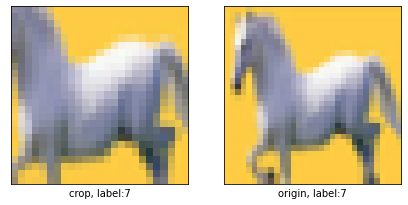

In [27]:
import torch
import matplotlib.pyplot as plt


# 노란 배경의 흰 말 사진(idx :808) 데이터로 확인
crop_image, l1 = cifar_test_RandomCrop[808] #transform 거친 데이터
image, l2 = test[808] # 원본 데이터

fig = plt.figure(figsize=(7, 7)) # 출력할 이미지 사이즈 조정

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(crop_image)
ax1.set_xlabel("crop, label:"+ str(l1))
ax1.set_xticks([]), ax1.set_yticks([])
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(image)
ax2.set_xlabel("origin, label:"+ str(l2))
ax2.set_xticks([]), ax2.set_yticks([])
 
plt.show()

위 출력 결과에서 crop 된 이미지가 사이즈에 맞춰 변형된 것을 확인할 수 있습니다. 참고로 cifar 10 데이터 셋에서 말 사진은 label 7로 분류됩니다. 또한, dataset으로 불러온 데이터들이 feature(데이터셋의 특징, cifar 데이터에서는 이미지 픽셀값)과 label 로 구성되어 있다는 것을 알 수 있습니다.



불러온 데이터 셋을 `DataLoader` 클래스로 묶어서 객체로 활용할 수 있습니다. 관련 내용은 이하 `DataLoader` 클래스 파트(링크)에서 자세히 다루도록 하겠습니다.

CIFAR 와 MNIST 외의 다양한 vision 데이터가 있습니다. 관련하여 공식문서 ([링크](https://pytorch.org/vision/stable/datasets.html)) 를 참조바랍니다.

---



### 1.2 TorchText

`TorchText` 는 자연어처리 라이브러리로 Tokenization 을 비롯한 다양한 기능을 제공하고 있습니다. 이번 단계에서는 `TorchText` 에서 제공하는 Datasets 을 활용하는 방법에 대해서 알아보겠습니다. `TorchText` 에 대한 자세한 설명은 관련 파트(링크) 에서 자세히 다루도록 하겠습니다.

*(추가예정)*



---





### 1.3 TorchAudio

`TorchAudio` 는 오디오 라이브러리로 ??? 을 비롯한 다양한 기능을 제공하고 있습니다. 이번 단계에서는 `TorchAudio` 에서 제공하는 Datasets 을 활용하는 방법에 대해서 알아보겠습니다. `TorchAudio` 에 대한 자세한 설명은 관련 파트(링크) 에서 자세히 다루도록 하겠습니다.

*(추가예정)*



---



### 1.4 Custom Dataset

사용자가 직접 Dataset을 정의하여 사용할 수도 있습니다.

*(추가예정)*

- https://tutorials.pytorch.kr/beginner/basics/tensorqs_tutorial.html

- https://sanghyu.tistory.com/90
- https://pytorch.org/docs/stable/data.html#dataloader-collate-fn
- https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html#id9



---



## 2. Data load

모델 학습 시 작은 양의 데이터를 사용할 때에는 모든 데이터를 한번에 처리할 수 있지만, 데이터의 양이 많아지면 처리에 어려움이 발생합니다. 

PyTorch  에서는 `torch.utils.data` 의 `DataLoader` 클래스로 데이터 셋을 batch 단위로 끊어 모델 학습에 전달하는 등 데이터를 나누어 관리할 수 있습니다.

이번 파트에서는 PyTorch 에서 모델 학습 시 데이터를 불러오는 방법에 대해 DataLoader 클래스와 함께 살펴보겠습니다.

### 2.1 DataLoader

우선, DataLoader 클래스의 파라미터를 안내하겠습니다.

#### 2.1.1 Batch

Batch 는 한번에 처리할 데이터 양을 의미합니다. 모델 학습 시 전체 데이터를 Batch 단위로 묶어 처리할 수 있습니다.

DataLoader 클래스에서는 `batch_size`  파라미터를 사용하여 Batch 의 크기를 조정합니다. 이때, 데이터 셋의 총 크기가 100일 때, batch_size 가 10 인 경우, 10번의 iteration 을 통해 모든 데이터를 거칠 수 있습니다.

`batch_size`  파라미터 값을 64로 설정하여 dataloader 객체를 정의하겠습니다. 주의해야 할 점은 각 데이터가 tensor 형태여야 합니다. transform 으로 tensor 로 변환하여 데이터를 가져왔던  `cifar_test_ToTensor` 데이터 셋을 DataLoader 로 가져오겠습니다.

In [67]:
from torch.utils.data import DataLoader

loader = DataLoader(cifar_test_ToTensor, batch_size=64)

loader 은 train 데이터 셋의 feature, label 과, test 데이터셋의 feature, label 의 batch 단위의 묶음을 가져옵니다. 따라서 loader  의 shape 는 다음과 같습니다.

In [68]:
feature, label = next(iter(loader))
print("feature shape : ",feature.shape)
print("label shape : ",label.shape)

feature shape :  torch.Size([64, 3, 32, 32])
label shape :  torch.Size([64])


이때, feature shape 는 `torch.Size([64, 3, 32, 32])` 로 64 는 batch_size, 3은 channel 수로 cifar 이미지가 3개의 채널(RGB)로 구성됨을 의미합니다. 또한 32, 32는 데이터의 크기가 32*32 픽셀임을 뜻합니다.

label 의 크기 역시 batch_size 로 64 크기의 int로 구성되어 있음을 확인할 수 있습니다.

---

#### 2.1.2 Shuffle

shuffle 은 데이터를 DataLoader 에서 섞어서 사용할지를 설정하는 파라미터입니다. 이때, test 데이터 셋에서는 shuffle 값을 false 로 설정하는 것에 유의해야 합니다. 또한 모델 학습 시 seed 를 고정하여 재현성을 유지하기 위해 `torch.manual_seed` 를 설정합니다.

DataLoader 클래스에서 `shuffle `  파라미터는 bool 형태로 True, False 값이 사용됩니다.

 `shuffle `  파라미터를 새로 지정하여 dataloader 객체를 정의하겠습니다. seed  또한 고정해두겠습니다.

In [69]:
from torch.utils.data import DataLoader

torch.manual_seed(42)
loader_with_shuffle = DataLoader(cifar_test_ToTensor, batch_size=64, shuffle=True)

feature_with_shuffle, label = next(iter(loader_with_shuffle))

8번째 이미지를 기준으로 shuffle 된 데이터 셋과 원본 데이터 셋을 비교하여 Shuffle 의 효과를 확인해보겠습니다. 

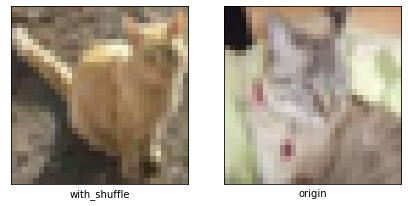

In [75]:
fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(feature_with_shuffle[8].permute(1,2,0))
ax1.set_xlabel("with_shuffle")
ax1.set_xticks([]), ax1.set_yticks([])
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(feature[8].permute(1,2,0))
ax2.set_xlabel("origin")
ax2.set_xticks([]), ax2.set_yticks([])
 
plt.show()

같은 index 의 이미지이지만 서로 다른 이미지가 출력되는 것을 통해 shuffle 을 통해 데이터가 섞였음을 확인할 수 있습니다.

---

#### 2.1.3 num_workers

- 추가 필요, 참조 자료 : https://jybaek.tistory.com/799
- 멀티 쓰래딩 관련하여 작성할 예정



이 외에도 sampler,  drop_last 등이 사용됩니다. 관련하여 공식문서 ([링크](https://pytorch.org/docs/stable/data.html)) 를 참조바랍니다.



---





### 2.2 custom DataLoader

사용자가 직접 DataLoader 을 정의하여 사용할 수도 있습니다.

DataLoader 클래스는 크게 3가지 파트로 구분됩니다.



#### 2.2.1 init



#### 2.2.2 get item



#### 2.2.3 len



- https://tutorials.pytorch.kr/beginner/data_loading_tutorial.html
- https://wingnim.tistory.com/33



---



## 3. Data Argument

- https://pytorch.org/vision/stable/transforms.html
- https://tutorials.pytorch.kr/beginner/basics/transforms_tutorial.html







*추가 예정*